In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import time
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [ ]:
"""
Cluster the channel visualizations using Kmeans,
Graph the SSE and identify an elbow point,
output images that represent cluster centroids.
"""

In [2]:
def import_images(image_dir):
    #positive_image_dir = 'output/lucid/conv5/positive/'
    images = []
    labels = []

    for i in range(2048):
        image = cv2.imread(os.path.join(image_dir, str(i) + '.png')).flatten()
        images.append(image)
        labels.append(i)
    return labels, images

def output_centers(centers, out_dir):
    cluster_images = []
    for center in centers:
        img = center.reshape((128,128,3))
        cluster_images.append(img)
    #out_dir = 'output/clustering/'
    for i in range(len(cluster_images)):
        cv2.imwrite(os.path.join(out_dir, str(i) + '.png'),cluster_images[i])
        
def get_elbow_point(image_dir):
    labels, images = import_images(image_dir)
    sse = []
    for i in range(2, 50):
        tic = time.perf_counter()
        print('started k=' + str(102-i))
        kmeans = KMeans(n_clusters=102-i, random_state=1)
        kmeans.fit(images)
        sse.append((102-i, kmeans.inertia_))
        toc = time.perf_counter()
        print(f'\tfinished in {toc - tic:}')
    for row in sse:
        print(row)
        print('\n\n')
    return sse

def plot_elbow_point(sse):
    x_axis = []
    y_axis = []
    for entry in sse:
        x_axis.append(entry[0])
        y_axis.append(entry[1])

    plt.plot(x_axis, y_axis, linewidth=1.0)

In [7]:

#kmeans = KMeans(n_clusters=8, random_state=1)
#kmeans.fit(positive_images)
#y_kmeans = kmeans.predict(positive_images)

In [8]:
#print(y_kmeans)

[5 7 1 ... 7 3 3]


In [8]:
new_sse_pos = []
for i in sse_pos:
    new_sse_pos.append([i[0]-51, i[1]])

In [3]:
sse_pos = get_elbow_point('output/lucid/conv5/positive/')

started k=100
	finished in 419.3167523
started k=99
	finished in 436.8211745
started k=98
	finished in 405.60071330000005
started k=97
	finished in 389.50664929999994
started k=96
	finished in 397.4589231000002
started k=95
	finished in 395.7219978000003
started k=94
	finished in 385.0934057999998
started k=93
	finished in 387.949478
started k=92
	finished in 392.17494480000005
started k=91
	finished in 388.34002789999977
started k=90
	finished in 387.2549586
started k=89
	finished in 378.7964369000001
started k=88
	finished in 374.2838913000005
started k=87
	finished in 377.8727587000003
started k=86
	finished in 377.2053342999998
started k=85
	finished in 371.43693220000023
started k=84
	finished in 373.8309734000004
started k=83
	finished in 375.4167714999994
started k=82
	finished in 372.4587801000007
started k=81
	finished in 384.2155812000001
started k=80
	finished in 394.35981360000005
started k=79
	finished in 366.10910069999954
started k=78
	finished in 374.35485159999917
star

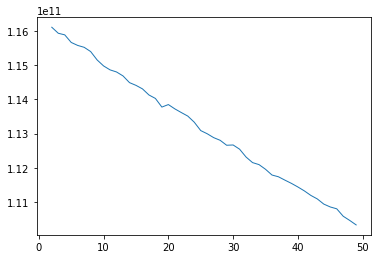

In [9]:
plot_elbow_point(new_sse_pos)

In [50]:
labels, images = import_images('output/lucid/conv5/positive')
kmeans = KMeans(n_clusters=100, random_state=1)
kmeans.fit(images)
output_centers(kmeans.cluster_centers_, 'output/clustering/')

In [52]:
y_kmeans = kmeans.predict(images)
clusters = []
for i in y_kmeans:
    if (i not in clusters):
        clusters.append(i)
clusters.sort()
        
cluster_sizes = []
for i in clusters:
    number = 0
    for j in y_kmeans:
        if (i == j):
            number += 1
    cluster_sizes.append(number)

for i in range(len(clusters)):
    print('cluster ' + str(clusters[i]) + ' is ' + str(cluster_sizes[i]) + ' large')


cluster 0 is 1 large
cluster 1 is 32 large
cluster 2 is 8 large
cluster 3 is 106 large
cluster 4 is 14 large
cluster 5 is 6 large
cluster 6 is 14 large
cluster 7 is 16 large
cluster 8 is 77 large
cluster 9 is 4 large
cluster 10 is 8 large
cluster 11 is 3 large
cluster 12 is 42 large
cluster 13 is 2 large
cluster 14 is 2 large
cluster 15 is 7 large
cluster 16 is 11 large
cluster 17 is 5 large
cluster 18 is 7 large
cluster 19 is 47 large
cluster 20 is 40 large
cluster 21 is 11 large
cluster 22 is 44 large
cluster 23 is 1 large
cluster 24 is 4 large
cluster 25 is 1 large
cluster 26 is 101 large
cluster 27 is 1 large
cluster 28 is 32 large
cluster 29 is 1 large
cluster 30 is 111 large
cluster 31 is 16 large
cluster 32 is 7 large
cluster 33 is 66 large
cluster 34 is 3 large
cluster 35 is 4 large
cluster 36 is 25 large
cluster 37 is 40 large
cluster 38 is 14 large
cluster 39 is 4 large
cluster 40 is 1 large
cluster 41 is 29 large
cluster 42 is 1 large
cluster 43 is 4 large
cluster 44 is 1 la

In [53]:
def output_clusters(y_kmeans):
    for i in range(2048):
        original = cv2.imread(os.path.join('output/lucid/conv5/positive', str(i) + '.png'))
        start_str=''
        if (y_kmeans[i] < 10):
            start_str='0'
        output_name = start_str + str(y_kmeans[i]) + '__' + str(i) + '.png'
        cv2.imwrite(os.path.join('output/clustering/clusterlist', output_name), original)

labels, images = import_images('output/lucid/conv5/positive')
kmeans = KMeans(n_clusters=50, random_state=1)
kmeans.fit(images)
y_kmeans = kmeans.predict(images)
output_clusters(y_kmeans)